## 1. 텍스트 분석을 바탕으로 한 서비스 또는 분석 프로젝트를 하나 제안해보세요. 
(목적, 데이터 유형, 분석 방법, 기대효과 등) 여기서 제시한 서비스 또는 분석 프로젝트를 바탕으로 중간고사 문제를 풉니다

- 프로젝트 : 텍스트 기반 영상 내용 검색
- 데이터 유형 : 영상, 음향, 텍스트
- 분석 방법
  1. 동영상의 음성 정보를 STT로 변환한다.
  2. 변환된 문장을 Sentence Bert 모델로 임베딩한다.
  3. 변환된 임베딩 벡터를 색인한다.
  4. 색인된 정보를 벡터 기반 검색하여 영상의 내용을 검색한다.
- 기대효과
  - 단순히 영상 제목이 아닌 사용자가 원하는 내용 기반 검색을 가능하도록한다.
  - 제목에서의 궁금증을 해결하기 위해 영상을 끝까지 보지 않아도 확인 가능하다
    - 예시 : "코로나vs독감vs감기 의사들이 구별하는 방법은?"
    - 예시 : "천문학적인 돈을 써가면서 화성에 집착하는 이유는 무엇일까?"

## 2. PROJECT를 위한 데이터 수집 방안을 제시해보세요.
  - 내용 검색을 하고자 하는 동영상을 수집한다.
  - 수집된 영상의 음성 데이터를 텍스트로 변환하여 텍스트 데이터를 추출한다.

## 3. 2번의 수집 방안과는 별개로, 중간고사 자체를 위한 데이터를 수집합니다. 여기서 수집한 데이터를 바탕으로 중간고사 문제를 풉니다
(이 데이터는 이하 DATA라고 칭합니다) 뉴스 웹스크래핑 또는 음성 인식을 통해 간단하게 1번에서 제시한 서비스/프로젝트를 위한 데이터를 수집해보세요. 데이터는 한국어로 수집하세요.


STT

In [ ]:
!pip install -U openai-whisper kiwipiepy

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import unicodedata

import tqdm
import whisper
from kiwipiepy import Kiwi

model = whisper.load_model("medium")
kiwi = Kiwi()

100%|█████████████████████████████████████| 1.42G/1.42G [00:25<00:00, 61.0MiB/s]


In [5]:
import glob
filelist = glob.glob('/content/drive/Othercomputers/내 노트북/study/06_TextAnalytics/*.mp4')

In [6]:
filelist

['/content/drive/Othercomputers/내 노트북/study/06_TextAnalytics/천문학적인 돈을 써가면서 화성에 집착하는 이유는 무엇일까_┃지식의 기쁨┃알고e즘.mp4']

In [7]:
for filename in filelist:
    print("filename :", filename)
    result = model.transcribe(filename, language='ko') # 음성 인식
    print("result :", filename)
    sents = kiwi.split_into_sents(result['text'])  # 문장 단위로 자르기
    print("sents :", filename)
    text = '\n\n'.join(sent.text for sent in sents) # 하나로 합치기
    print(text)
    txt_name = "/content/./savefile.txt"
    txt_name = unicodedata.normalize('NFC', txt_name) # NFC로 노말라이즈
    with open(txt_name, "w") as f:
        f.write("contents\n")
        f.write(text)

filename : /content/drive/Othercomputers/내 노트북/study/06_TextAnalytics/천문학적인 돈을 써가면서 화성에 집착하는 이유는 무엇일까_┃지식의 기쁨┃알고e즘.mp4
result : /content/drive/Othercomputers/내 노트북/study/06_TextAnalytics/천문학적인 돈을 써가면서 화성에 집착하는 이유는 무엇일까_┃지식의 기쁨┃알고e즘.mp4
sents : /content/drive/Othercomputers/내 노트북/study/06_TextAnalytics/천문학적인 돈을 써가면서 화성에 집착하는 이유는 무엇일까_┃지식의 기쁨┃알고e즘.mp4
만약에 외계인 천문학자들이 있다면 태양계를 이렇게 보잖아요.

그러면 행성들을 볼 거예요.

지구라는 행성과 가장 비슷하고 거의 쌍둥이라고 얘기할 것은 화성이 아니라 사실 금성입니다.

크기가 비슷해요.

지구랑.

그리고 거리도 가까이 있고요.

그래서 당연히 지구와 금성을 택할 겁니다.

그런데 문제는 이산화탄소.

그래서 이거 먹음

껏 있는 거죠.

그래서 표면에서의 온도가 450도.

그래서 태양계 내에서 가장 뜨거운 것 중에 하나겠죠.

그 온실 효과라고 얘기하는.

뭐 요즘에 지구 온도나 얘기하고 그러는데 어떤 인계점이 넘어버리면 그렇게 될 거다 하고 이렇게 걱정을 하는 본보기가 사실은 금성 표면입니다.

그래서 금성은 사실은 가깝고 또 지구와 비슷해서 우리의 관심사지만 너무 뜨거워서 당분간은.

그래서 그 다음에 관심이 가는 게 화성입니다.

지금 보시는 게 화성인데요.

반 정도 크기가 반만 합니다.

굉장히 특징적인 모습이 

# 4. DATA를 바탕으로 문서단어행렬을 그리고, 단어구름으로 시각화해보세요. 
분석 결과를 설명해보세요.

In [8]:
def extract_nouns(text):
    for token in kiwi.tokenize(text):
        if token.tag in {'NNG', 'NNP'}:
            yield token.form

In [79]:
import pandas as pd
df = pd.read_csv('/content/savefile.txt', delimiter = "\t")
df.head(30)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,contents
0,만약에 외계인 천문학자들이 있다면 태양계를 이렇게 보잖아요.
1,그러면 행성들을 볼 거예요.
2,지구라는 행성과 가장 비슷하고 거의 쌍둥이라고 얘기할 것은 화성이 아니라 사실 금성...
3,크기가 비슷해요.
4,지구랑.
5,그리고 거리도 가까이 있고요.
6,그래서 당연히 지구와 금성을 택할 겁니다.
7,그런데 문제는 이산화탄소.
8,그래서 이거 먹음
9,껏 있는 거죠.


문서단어행렬

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=extract_nouns)
dtm = cv.fit_transform(df.contents)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
dtm.shape

(352, 449)

In [12]:
cv.get_feature_names_out()

array(['3파전', '가능', '가스', '가운데', '가축', '감자', '강', '강바닥', '개', '개념', '개발',
       '갤럭틱', '거리', '거장', '걱정', '겨울', '결과', '결과물', '결론', '경우', '경험', '계도',
       '계속', '계약', '계절', '계획', '고립', '골', '곳', '곳곳', '공급', '공기', '공정',
       '과', '과장', '과학', '과학자', '관', '관광지', '관심', '관심사', '관측', '구분', '구주',
       '구찻기', '구체', '국', '국가', '국민', '국적', '국제', '규모', '그동안', '그때', '그래픽',
       '극', '근처', '금', '금성', '기사', '기술', '기자', '기적', '기점', '기존', '기지',
       '길', '꼬마', '꿈', '끝', '나라', '나사', '날씨', '남국', '남극', '남자', '내년',
       '네덜란드', '네이트', '노', '노문', '노버팔', '노캐', '노켓', '논쟁', '눈초리', '눈치',
       '다', '다음', '단순', '단축', '달', '당시', '대계', '대기', '대략', '대본', '대학',
       '데뷔', '도전', '돈', '동안', '동일', '드라이', '드론', '듣기', '등장', '땅', '때',
       '량', '러시아', '마션', '마을스', '마음', '만약', '만화', '말', '말스', '말스원', '말씀',
       '망갈리', '머스크', '메탄', '메탄가스', '모니터링', '모스크바', '모습', '모자이크', '목격',
       '목적', '목표', '무', '무인', '무해', '문제', '물', '물리학', '미국', '미래', '미생물',
       '미아', '미터', '민간', '민간인', '밀도', '밑', '바람', '바이오스피어2',

In [13]:
dtm.sum(axis=0)

matrix([[ 1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  4,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  2,  4,  1,  1,  5,
          1,  1,  1,  2, 11,  1,  1,  6,  1,  5,  1,  1,  1,  1,  1,  3,
          1,  3,  4,  1,  1,  1,  1,  1,  2,  1,  4,  1,  4,  1,  1,  1,
          2,  1,  1,  1,  2,  2,  3,  4,  1,  1,  1,  2,  2,  1,  5,  3,
          1,  1,  1,  4,  1,  1,  1,  1,  6,  1,  1,  8,  1,  2,  5,  1,
          1,  1,  1,  1,  7,  5,  1,  1,  1,  1,  1,  4, 14,  1,  1,  1,
          1,  1,  2,  3,  6,  3,  2,  4,  1,  4,  2,  5,  1,  2,  5,  1,
          1,  1,  1,  1,  4,  1,  8,  9,  1, 11,  1,  4,  1,  1,  3,  3,
          1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  2,  5,  2,  1,  1,  4,
          1,  1,  1,  1,  1,  1,  1,  7,  3,  1,  1,  1,  1,  1,  2,  1,
         27,  2, 10,  1,  1,  2,  2,  3,  4,  2,  4,  2,  2,  1,  1,  3,
          1,  1,  4,  2,  2,  1,  2,  1,  1,  1,  5,  3,  1,  2,  2,  1,
          3,  1,  1,  3,  1,  1,  3,  1,  1,  2,  1

In [14]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': dtm.sum(axis=0).flat
})

In [18]:
word_count.sort_values('빈도', ascending=False).head(25)

,단어,빈도
436,화성,48
176,사람,27
359,지구,14
108,때,14
402,탐사선,14
36,과학자,11
439,활동,11
137,미국,11
178,사실,10
290,우주,10


단어구름

In [ ]:
!apt install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

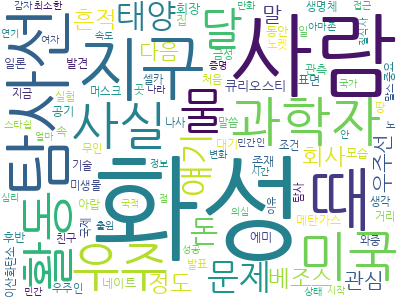

In [17]:
from wordcloud import WordCloud

wc = WordCloud(
  font_path='NanumGothic.ttf', # 글꼴 파일이 있을 경우
  background_color='white',    # 배경색
  max_words=100,               # 시각화할 단어 개수
  width=400,                   # 가로 크기
  height=300)                  # 세로 크기

count_dic = dict(zip(word_count.단어, word_count.빈도))
cloud = wc.fit_words(count_dic)
cloud.to_image()

#5. 4번의 분석 결과를 PROJECT에 어떻게 할용할 수 있는지 설명하세요.
- 영상의 제목은 "천문학적인 돈을 써가면서 화성에 집착하는 이유는 무엇일까"이다.
- 물, 흔적, 이산화탄소, 미생물 등 왜 화성에 집착하는 이유를 예측해볼만한 키워드가 추출되었다.
- 추출된 단어로 토픽모델링에 활용한다.

#6. DATA를 바탕으로 토픽 모델링을 실시하세요. LSA, NMF, LDA, SBERT를 이용한 키워드 추출을 해보고, 가장 적절한 방법을 고르세요.


In [19]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=1234)
doc_emb = svd.fit_transform(dtm)

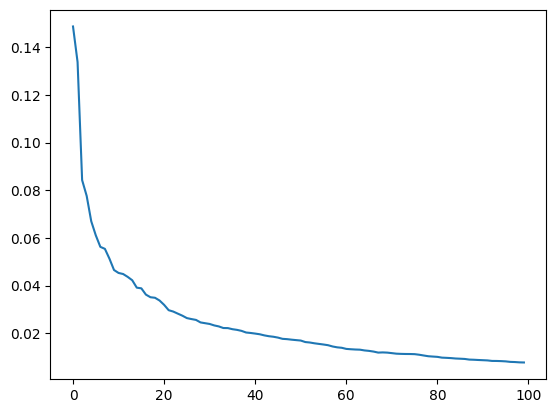

In [20]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)

##LSA

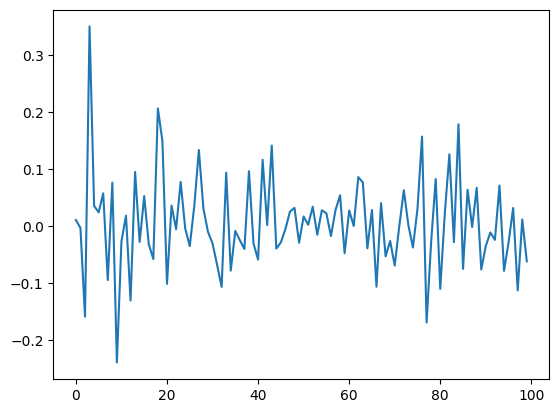

In [21]:
word_emb = svd.components_.T

words = cv.get_feature_names_out().tolist()
i = words.index('흔적')

plt.plot(word_emb[i])

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_emb)


import numpy as np
s = np.argsort(sim[i])
related = s[-2:-12:-1]
for j in related:
    print(words[j])

가운데
물
발견
화
계도
공정
뷰
이유
진눈깨비
애


In [24]:
indices = []
target = ['물', '진눈깨비', '이산화탄소', '미생물', '이유', '탐사선']
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

dist = 1 - sim[indices, ][:, indices]

from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', random_state=1234)
pos = mds.fit_transform(dist)

물 135
진눈깨비 367
이산화탄소 305
미생물 139
이유 308
탐사선 402


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
!pip install adjusttext

In [26]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
from adjustText import adjust_text
plt.plot(pos[:, 0], pos[:, 1], '.')
texts = [plt.text(pos[i, 0], pos[i, 1], w) for i, w in enumerate(target)]
adjust_text(texts)

In [ ]:
!pip install factor_analyzer

In [ ]:
from factor_analyzer.rotator import Rotator
rotator = Rotator()
rot = rotator.fit_transform(word_emb)

plt.plot(rot[i])

In [30]:
t = np.argmax(rot[i])

topic_words_idx = np.argsort(rot[:, t])

for j in topic_words_idx[-1:-11:-1]:
    print(words[j])

탐사선
열애
세
언제
유인
관심
무인
대학
아빠
말스


##NMF

In [31]:
from sklearn.decomposition import NMF
NUM_TOPICS = 15
nmf = NMF(n_components=NUM_TOPICS)
doc_emb = nmf.fit_transform(dtm)

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
word_emb = nmf.components_.T

words = cv.get_feature_names_out().tolist()
i = words.index('흔적')

plt.plot(word_emb[i])

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_emb)


import numpy as np
s = np.argsort(sim[i])
related = s[-2:-12:-1]
for j in related:
    print(words[j])

가운데
물
흙
계절
진흙
생각
상태
결론
합의
전체


In [36]:
indices = []
target = ['물', '이유', '탐사선', '흙', '진흙']
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

dist = 1 - sim[indices, ][:, indices]

from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', random_state=1234)
pos = mds.fit_transform(dist)

물 135
이유 308
탐사선 402
흙 447
진흙 369


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
from adjustText import adjust_text
plt.plot(pos[:, 0], pos[:, 1], '.')
texts = [plt.text(pos[i, 0], pos[i, 1], w) for i, w in enumerate(target)]
adjust_text(texts)

In [38]:
for t in range(NUM_TOPICS):
    print(t)
    topic_words_idx = np.argsort(rot[:, t])

    for j in topic_words_idx[-1:-11:-1]:
        print(words[j])

0
화성
접근
꿈
입장
인공위성
국민
이주
바퀴
양
주기
1
사람
우주선
개념
스타트업
말스
네덜란드
청년
관측
접근
아이디어
2
발사
골
내년
대계
석유
무
개발
국가
유럽
무인
3
상태
생각
진흙
흙
액체
땅
표면
물
존재
만약
4
베조스
회장
아마존
브랜슨
차이
블루
오리진
머스크
일론
문제
5
탐사
나라
연기
경험
모습
유럽
엑소
준비
무인
모스크바
6
지구
진
량
금성
주범
온난
화산
주의
금
관심사
7
스타쉽
시작
무인
우주인
옛날
거리
노켓
정보
큐리오스티
켓
8
후반
탐사
유인
도전
친구
나사
과학자
경험
연기
얘기
9
최근
근처
탐지
호수
남극
관측
액체
크기
지하
기술
10
일
흥미
오랐
발생
방향
그동안
생명체
발견
우주
태양
11
존재
바람
차이
대기
한쪽
공기
축적
회장
거리
지상
12
중반
우주선
모습
다음
대기
탐사
연기
금성
활약
필요
13
노켓
때
금성
미아
근처
이야기
여행
만약
접근
외계인
14
말씀
중반
집
노켓
엑소
배설
큐리오스티
우주국
탐사선
준비


In [39]:
doc_id = 3

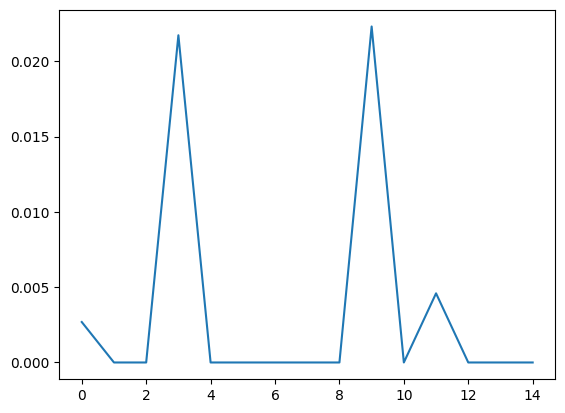

In [40]:
plt.plot(doc_emb[doc_id])

In [41]:
topic_id = np.argmax(doc_emb[doc_id])
topic_id

9

연관이 가장 강한 토픽 내용

In [42]:
topic_docs_idx = np.argsort(doc_emb[:,topic_id])[-1:-11:-1]
df.iloc[topic_docs_idx]

,contents
98,"지금까지 관측 결과를 바탕으로 개연서 출원을 하면, 그런데 또 한편으로 메탄가스가 ..."
95,"최근에는 땅 속을 탐지하는 기술을 가지고 관측을 해봤더니 화성의 남극 쪽에, 거 근..."
94,변화가 있는 곳들도 관측이 되고 있어요.
120,맞으면 그동안 과학자들이 해왔던 방향이 오랐다는 거고 두 번째 태양계 내에서 또는 ...
154,그래서 가끔씩 화성 대접근 그래서 관측해 열고 갑니다.
114,땅을 파서 메탄가스를 뿜어내는 미생물이 있는지를 확인하는 거예요.
102,그런데 이제 들어가면 송화를 돕기 위해서 그런 작용을 시키는 미생물이 존재해서 그거...
105,그렇다면 지하에서 젖어 있는 땅 속에서 메탄가스를 만들어내는 미생물이나 박테리가 있...
39,그래서 화성에 대해서 알게 된 걸 가지고 화성은 지금 굉장히 관심이 가는 게 생명체...
121,만약에 발견을 못했어요.


패턴이 가장 비슷한 내용

In [43]:
sims = cosine_similarity(doc_emb[[doc_id]], doc_emb).flatten()
sim_idx = np.argsort(sims)[-1:-11:-1]
df.iloc[sim_idx]

,contents
3,크기가 비슷해요.
247,직운 기술로 가면 뭐 이런 거죠.
253,기존의 기술로 가는 겁니다.
237,첫 번째 조건은 기존의 기술로 간다.
105,그렇다면 지하에서 젖어 있는 땅 속에서 메탄가스를 만들어내는 미생물이나 박테리가 있...
92,그런 흔적들이 되게 많이 발견이 되고 있어요.
114,땅을 파서 메탄가스를 뿜어내는 미생물이 있는지를 확인하는 거예요.
95,"최근에는 땅 속을 탐지하는 기술을 가지고 관측을 해봤더니 화성의 남극 쪽에, 거 근..."
236,두 가지 조건을 내셨습니다.
254,두 번째 조건은 가서 안 오는 겁니다.


In [44]:
sims[sim_idx]

array([1.        , 0.98918692, 0.98911204, 0.98779738, 0.97747952,
       0.93778005, 0.91947772, 0.91617089, 0.80597029, 0.80597029])

##LDA

In [45]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from gensim.matutils import Sparse2Corpus
words = cv.get_feature_names_out().tolist()
corpus = Sparse2Corpus(dtm.T)
id2word = dict(enumerate(words))

In [47]:
corpus[0]

[(114, 1), (283, 1), (376, 1), (404, 1)]

In [48]:
from gensim.models.ldamodel import LdaModel
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=20,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    iterations=400,
    alpha='auto',
    eta='auto',
    per_word_topics=True)

In [49]:
lda_model.show_topic(1)

[('말', 0.14135136),
 ('아이스', 0.019614283),
 ('물', 0.019614283),
 ('드라이', 0.019614283),
 ('모자이크', 0.019613793),
 ('봇', 0.0017616326),
 ('노', 0.0017616326),
 ('기자', 0.0017616326),
 ('계획', 0.0017598821),
 ('미국', 0.0017598821)]

In [50]:
lda_model.show_topics()

[(17,
  '0.023*"여름" + 0.023*"겨울" + 0.023*"진눈깨비" + 0.023*"일정" + 0.002*"표면" + 0.002*"대기" + 0.002*"활동" + 0.002*"존재" + 0.002*"화성" + 0.002*"소리"'),
 (4,
  '0.086*"발견" + 0.086*"생명체" + 0.019*"관심" + 0.019*"초점" + 0.019*"화" + 0.002*"일" + 0.002*"우주" + 0.002*"그동안" + 0.002*"오랐" + 0.002*"방향"'),
 (2,
  '0.115*"큐리오스티" + 0.021*"꼬마" + 0.021*"드론" + 0.021*"아이" + 0.002*"크기" + 0.002*"셀카" + 0.002*"탐사선" + 0.002*"박테리아" + 0.002*"날씨" + 0.002*"유지"'),
 (1,
  '0.141*"말" + 0.020*"아이스" + 0.020*"물" + 0.020*"드라이" + 0.020*"모자이크" + 0.002*"봇" + 0.002*"노" + 0.002*"기자" + 0.002*"계획" + 0.002*"미국"'),
 (18,
  '0.091*"곳" + 0.083*"변화" + 0.035*"정보" + 0.019*"관측" + 0.019*"이후" + 0.019*"수집" + 0.002*"인체" + 0.002*"중요" + 0.002*"국제" + 0.002*"우주"'),
 (11,
  '0.295*"때" + 0.071*"생각" + 0.024*"상태" + 0.012*"진흙" + 0.012*"땅" + 0.012*"흙" + 0.012*"표면" + 0.012*"존재" + 0.012*"액체" + 0.012*"하루"'),
 (7,
  '0.330*"사실" + 0.088*"다음" + 0.012*"인사이트" + 0.012*"자리" + 0.012*"지진" + 0.012*"밑" + 0.012*"침" + 0.012*"오비터" + 0.012*"탐" + 0.012*"온도계"'),
 (5,
  '0.166*"활동" 

In [51]:
word_idx = words.index('흔적')
lda_model.get_term_topics(word_idx)

[(19, 0.0819144)]

In [52]:
doc_idx = 1
lda_model.get_document_topics(corpus[doc_idx])

[(0, 0.041972205),
 (1, 0.018046381),
 (2, 0.017847888),
 (3, 0.08238515),
 (4, 0.01769968),
 (5, 0.029634716),
 (6, 0.020050248),
 (7, 0.02714211),
 (8, 0.019873312),
 (9, 0.02007788),
 (10, 0.023507047),
 (11, 0.026865399),
 (12, 0.023433581),
 (13, 0.02565635),
 (14, 0.49949905),
 (15, 0.02636192),
 (16, 0.019952893),
 (17, 0.016563345),
 (18, 0.018856667),
 (19, 0.02457421)]

In [53]:
lda_model.log_perplexity(corpus)

-16.821451143254805

In [54]:
topn = 25
top_words = set()

for topic in range(lda_model.num_topics):
    for word, prob in lda_model.show_topic(topic, topn=topn):
        top_words.add(word)

len(top_words) / (lda_model.num_topics * topn)

0.602

In [ ]:
!pip install pyLDAvis==2.1.2

In [56]:
from gensim.corpora.dictionary import Dictionary
dic = Dictionary()
dic.id2token = id2word
dic.token2id = {w: i for i, w in id2word.items()}

In [57]:
import pyLDAvis.gensim
p = pyLDAvis.gensim.prepare(lda_model, corpus, dic, sort_topics=False)
pyLDAvis.display(p)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


##BERT

In [ ]:
!pip install sentence_transformers

In [59]:
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
model = SentenceTransformer('jhgan/ko-sroberta-multitask')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
doc_emb = model.encode(df['contents'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

doc_idx = 23
dists = cosine_distances(doc_emb[[doc_idx]], doc_emb).flatten()
df.iloc[np.argsort(dists)[:10]]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,contents
23,그래서 화성에 관심을 갖는 이유가 여러 가지가 있는데 그중에서 하나가 물이 흘렀던 ...
39,그래서 화성에 대해서 알게 된 걸 가지고 화성은 지금 굉장히 관심이 가는 게 생명체...
95,"최근에는 땅 속을 탐지하는 기술을 가지고 관측을 해봤더니 화성의 남극 쪽에, 거 근..."
15,그래서 그 다음에 관심이 가는 게 화성입니다.
16,지금 보시는 게 화성인데요.
239,왜냐하면 아까 보신 것처럼 굉장히 많은 화성 무인 탐사선이 갔어요.
151,그럴 때를 화성 대접근이라고 불러요.
154,그래서 가끔씩 화성 대접근 그래서 관측해 열고 갑니다.
22,요즘에 천문학자들이 전체적으로 합의하고 있고 결론 내리고 있는 것들은 물이 흘렀던 ...
129,그래서 어쨌든 제가 말씀드리고 싶은 것은 이런 무인탐사선이 가서 화성에서 생명체 여...


In [81]:
word_emb = model.encode(words)
dists = cosine_distances(doc_emb[[doc_idx]], word_emb).flatten()
for i in np.argsort(dists)[:5]:
    print(words[i])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


탐사선
탐사
소행성
행성
물


In [82]:
from scipy.special import factorial
n = 10
k = 5
factorial(n)/factorial(n-k)/factorial(k)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


252.0

In [83]:
import itertools

max_dist = 0
max_combi = None
candidates = np.argsort(dists)[:n]
for combi in itertools.combinations(candidates, k):
    word_dists = cosine_distances(word_emb[list(combi)])
    sum_dist = word_dists.sum()
    if sum_dist > max_dist:
        max_dist = sum_dist
        max_combi = combi

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
max_dist

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


13.616352

In [85]:
for i in max_combi:
    print(words[i])

소행성
물
우주국
강
흔적


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
from sklearn.metrics.pairwise import cosine_similarity
diversity = 0.5 #1에 가까울수록 키워드간 연관도 멀어짐
keyword, *candidates = np.argsort(dists)[:n].tolist()
keywords = [keyword]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
keywords

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[402]

In [88]:
for i in keywords:
    print(words[i])

탐사선


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#7. 6번에서 고른 방법의 결과를 설명하세요.
- LSA : 물, 발견, 진눈깨비
- NMF : 진흙, 흙, 액체, 땅, 표면, 물, 존재
- LDA : 1번토픽(물, 미생물, 박테리아, 사람), 공기, 생명, 생명체
- BERT : "물이 흘렀던 흔적"이 들어간 문장과 유사한 내용을 가진 문장들의 주요 키워드로 "탐사선"이 나옴

#8. 7번의 분석 결과를 PROJECT에 어떻게 할용할 수 있는지 설명하세요.
아래와 같은 주요 키워드를 검색 키워드로 사용한다.
- 흔적과 관련된 키워드(물, 발견, 진눈깨비, 진흙, 흙, 액체, 땅, 표면)
- 탐사와 관련된 키워드(미생물, 박테리아, 생명체, 존재)

#9. PROJECT에 검색을 포함할 방법을 설명하세요. DATA를 이용하여 검색의 예시를 제시하세요.
- 위에서 발견한 주요 키워드들을 검색 키워드로 사용하여 "흔적", "탐사" 에 대해 검색한다.

In [ ]:
!pip install sentence-transformers

In [90]:
from sentence_transformers import SentenceTransformer
sbert = SentenceTransformer(
    'snunlp/KR-SBERT-V40K-klueNLI-augSTS')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
from sklearn.metrics.pairwise import cosine_similarity
emb = sbert.encode(df.contents)

query_emb = sbert.encode(['화성에 집착하는 이유'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
query_emb

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 1.47879231e+00,  2.05363303e-01, -1.86503917e-01,
         3.41959536e-01, -7.11433768e-01, -5.38923204e-01,
         5.89262962e-01,  2.00905249e-01, -8.37122574e-02,
         3.22924912e-01,  4.55831259e-01,  3.59874517e-01,
        -4.41186339e-01, -1.69785663e-01,  1.72537133e-01,
         7.10752070e-01, -5.95129967e-01,  9.39340949e-01,
         7.85115659e-01, -2.65345365e-01, -7.89239258e-02,
         1.43673885e+00, -2.95173377e-01,  6.87892079e-01,
         2.99372703e-01, -1.93946257e-01, -4.07960176e-01,
         3.39436293e-01, -7.43919671e-01,  1.87033072e-01,
         2.02907637e-01, -1.01124477e+00,  4.82867002e-01,
        -5.44336259e-01, -7.59932637e-01,  1.26176074e-01,
        -3.99215609e-01, -2.00633332e-01,  9.50070262e-01,
         4.73004766e-02, -5.15079439e-01,  1.55913785e-01,
        -7.42931783e-01, -7.80373991e-01, -1.48004487e-01,
         1.79471403e-01,  1.32587051e+00,  3.08486462e-01,
         2.05253458e+00,  7.75744438e-01, -1.76645011e-0

In [ ]:
!pip install chromadb

In [95]:
import chromadb

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
client = chromadb.Client()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
collection = client.create_collection(
    name="mars", 
    embedding_function=sbert.encode)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
metadatas = df.contents.map(lambda x: {'length': len(x)}).tolist()
ids = df.index.map(str).tolist()
collection.add(
    documents=df.contents.tolist(),
    metadatas=metadatas,
    ids=ids
)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
results = collection.query(
    query_texts=["화성에 집착하는 이유"],
    n_results=15,
    where={"length": {'$lt': 150}},
    where_document={"$contains":"흔적"}
)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
results

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'ids': [['23', '22', '97', '91', '92', '19']],
 'embeddings': None,
 'documents': [['그래서 화성에 관심을 갖는 이유가 여러 가지가 있는데 그중에서 하나가 물이 흘렀던 흔적이 있다 하는 것입니다.',
   '요즘에 천문학자들이 전체적으로 합의하고 있고 결론 내리고 있는 것들은 물이 흘렀던 흔적인 것 같다.',
   '표면에는 물이 스며들거나 이런 거 흘렀던 흔적은 있지만 땅을 파고 들어가면 몇 미터를 젖어 있는 액체 상태의 물이 있어서 흙이 젖으면 진흙같이 되어 있는 그런 상태가 존재할 거라고 생각을 하고 있습니다.',
   '그리고 물이 흘렀던 흔적, 이것도 사실은 물이 흘렀던 흔적이잖아요.',
   '그런 흔적들이 되게 많이 발견이 되고 있어요.',
   '가운데에 이렇게 어떤 긁힌 흔적같이.']],
 'metadatas': [[{'length': 61},
   {'length': 55},
   {'length': 113},
   {'length': 37},
   {'length': 25},
   {'length': 20}]],
 'distances': [[303.533447265625,
   499.04693603515625,
   566.8078002929688,
   635.9579467773438,
   698.48681640625,
   712.595458984375]]}

In [107]:
results = collection.query(
    query_texts=["화성에 집착하는 이유"],
    n_results=15,
    where={"length": {'$lt': 150}},
    where_document={"$contains":"생명체"}
)
results

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'ids': [['39', '129', '120', '40']],
 'embeddings': None,
 'documents': [['그래서 화성에 대해서 알게 된 걸 가지고 화성은 지금 굉장히 관심이 가는 게 생명체의 발견 쪽에 초점이 맞춰져 있습니다.',
   '그래서 어쨌든 제가 말씀드리고 싶은 것은 이런 무인탐사선이 가서 화성에서 생명체 여부를 따지는 것이 지금 끝에 와 있는 거예요.',
   '맞으면 그동안 과학자들이 해왔던 방향이 오랐다는 거고 두 번째 태양계 내에서 또는 전 우주에서 생명체가 발견되니까 엄청난 흥미로운 일이 발생하는 거고요.',
   '그런데 우리 같은 이런 어떤 지적 생명체는 아니고요.']],
 'metadatas': [[{'length': 67},
   {'length': 71},
   {'length': 85},
   {'length': 29}]],
 'distances': [[307.970458984375,
   330.0240783691406,
   468.5392761230469,
   513.2719116210938]]}

In [113]:
results = collection.query(
    query_texts=["화성에 돈을 쓰는 이유"],
    n_results=15,
    where={"length": {'$lt': 150}},
    where_document={"$contains":"생명체"}
)
results

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'ids': [['129', '39', '120', '40']],
 'embeddings': None,
 'documents': [['그래서 어쨌든 제가 말씀드리고 싶은 것은 이런 무인탐사선이 가서 화성에서 생명체 여부를 따지는 것이 지금 끝에 와 있는 거예요.',
   '그래서 화성에 대해서 알게 된 걸 가지고 화성은 지금 굉장히 관심이 가는 게 생명체의 발견 쪽에 초점이 맞춰져 있습니다.',
   '맞으면 그동안 과학자들이 해왔던 방향이 오랐다는 거고 두 번째 태양계 내에서 또는 전 우주에서 생명체가 발견되니까 엄청난 흥미로운 일이 발생하는 거고요.',
   '그런데 우리 같은 이런 어떤 지적 생명체는 아니고요.']],
 'metadatas': [[{'length': 71},
   {'length': 67},
   {'length': 85},
   {'length': 29}]],
 'distances': [[364.7051086425781,
   373.2878723144531,
   523.8873901367188,
   568.882080078125]]}

10. PROJECT를 추진하기 위해 2~9번으로 부족한 부분을 설명하고, 이에 대한 보완 방반을 제시하세요.

- 프로젝트 : "텍스트 기반 영상 내용 검색'

- 현황
  - 영상 컨텐츠 서비스에서는 검색어에 대한 원하는 결과를 제목만으로 파악하기 어려움
  - 오히려 제목에 궁금증을 더하여 사람들의 클릭을 유도함
- 기대효과
  - 영상을 끝까지 보지 않아도 확인 가능함

- 수행방법
  - 동영상의 음성 데이터를 STT로 변환하여 각 문장을 임베딩하고, 색인하여 검색을 수행하였다.

- 부족한점
  - 검색 결과는 방송에 나왔던 멘트를 그대로 보여주었기 때문에, 정확한 이유를 해소하기에는 어려움이 있었음.

- 보완 방안
  - 색인어 생성 로직 보완
    - 토픽모델링을 활용하여 주제별 주요 문장 추출 및 요약